<div style='text-align:center'><h1>ISE 316 HOMEWORK-2</h1><div>

<div style="text-align: right"> Doğaç TOPAY <br> 20170703029 </div>

### Question 1

####   Consider the cheesecake delivery problem introduced in the lecture notes where there are 11 nodes: 1 bakery and 10 customers (see lecture notes).

##### Q1.1  How do you characterize a feasible solution if customers 3 and 5 should be visited consecutively? (the order does not matter)

> I may assume that customer 3 and 5 is a single customer, I would think that these are package like [3,5] or [5,3] I would decide that which combination I should use regarding to the feasible solutions.Assuming this nodes single will be result always the packageman certainly visit them consecutively.

##### Q1.2  How many feasible solutions are there?

> There are 10! feasible solutions.However, if we are assuming it based on previous question there are 2 x 9! solutions.

### Question 2

#### Consider the graph shown below that represents 8 points to be included in a TSP (traveling salesperson) problem and the table that shows the length of the directed edges. (Write a python code for the following parts)

##### Q2.1  Considering that the eventual goal is to construct a TSP tour, write a python code to complete the missing entries of the distance matrix (used to solve the TSP) by finding the length of the shortest paths for the corresponding node pairs (use networkx package).

In [355]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [356]:
edges = [('1','2',134), ('1','5',72), ('1','6',171),
         ('2','1',150),('2','3',136),
         ('3','4',173), ('3','7',80),('3','8',173),
         ('4','2',186),('4','5',152),
         ('5','7',167), ('5','8',191),
         ('6','3',33), ('6','7',94),
         ('7','4',74),('7','8',146) ,
         ('8','2',25),('8','7',135)]

In [357]:
G=nx.DiGraph()

In [358]:
G.add_weighted_edges_from(edges)

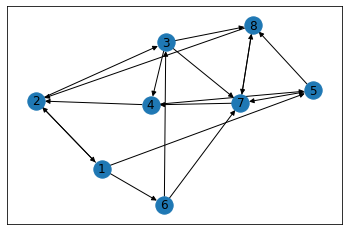

In [359]:
pos = nx.spring_layout(G,scale=1)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

In [514]:
def sync(edges):
    a=np.zeros([8,8])

    for i,j in enumerate(edges):
        m=int(edges[i][0])
        k=int(edges[i][1])
        l=int(edges[i][2])
        a[m-1,k-1]=l 

    for i in range(len(a)):
        for j in range(len(a)):
            if i!=j and a[i][j]==0:
                a[i][j]=nx.dijkstra_path_length(G,'{}'.format(i+1),'{}'.format(j+1))
    z=pd.DataFrame(a,columns=[i for i in range(1,9)],index=[i for i in range(1,9)])
                
    return a

a=sync(edges)

In [516]:
z=pd.DataFrame(a,columns=[i for i in range(1,9)],index=[i for i in range(1,9)])
z

,1,2,3,4,5,6,7,8
1,0.0,134.0,204.0,313.0,72.0,171.0,239.0,263.0
2,150.0,0.0,136.0,290.0,222.0,321.0,216.0,309.0
3,348.0,198.0,0.0,173.0,306.0,519.0,80.0,173.0
4,336.0,186.0,322.0,0.0,152.0,507.0,319.0,343.0
5,366.0,216.0,352.0,241.0,0.0,537.0,167.0,191.0
6,381.0,231.0,33.0,168.0,320.0,0.0,94.0,206.0
7,321.0,171.0,307.0,74.0,226.0,492.0,0.0,146.0
8,175.0,25.0,161.0,209.0,247.0,346.0,135.0,0.0


##### Q2.2  Find a TSP tour by using the nearest neighbor algorithm.

In [538]:
print('########### RESULTS ########### \n \n')
paths=[]
a[a==0]=900
for l in range(len(a)):
    a=sync(edges)
    tours=[]
    total_length=0
    lim=0
    current=l
    tours.append(current+1)
    while lim<len(a)-1:
        sh=np.argmin(a[current])
        m=0
        while m<1:
            sh=np.argmin(a[current])
            if sh+1 in tours:
                a[current][sh]=999
            else:
                m=m+1

        sh=np.argmin(a[current])
        tours.append(sh+1)
        total_length+=a[current][sh]
        current=sh
        lim+=1
    paths.append(total_length)
    print(f"Starting the tour from {l+1}, total path length is {total_length}")
    print(tours,"\n")
    print("**"*10,"\n")
a=sync(edges)
z=pd.DataFrame(a,columns=[i for i in range(1,9)],index=[i for i in range(1,9)])

########### RESULTS ########### 
 

Starting the tour from 1, total path length is 1154.0
[1, 5, 7, 4, 2, 3, 8, 6] 

******************** 

Starting the tour from 2, total path length is 979.0
[2, 3, 7, 4, 5, 8, 1, 6] 

******************** 

Starting the tour from 3, total path length is 843.0
[3, 7, 4, 5, 8, 2, 1, 6] 

******************** 

Starting the tour from 4, total path length is 1145.0
[4, 5, 7, 8, 2, 3, 1, 6] 

******************** 

Starting the tour from 5, total path length is 1082.0
[5, 7, 4, 2, 3, 8, 1, 6] 

******************** 

Starting the tour from 6, total path length is 705.0
[6, 3, 7, 4, 5, 8, 2, 1] 

******************** 

Starting the tour from 7, total path length is 1097.0
[7, 4, 5, 8, 2, 3, 1, 6] 

******************** 

Starting the tour from 8, total path length is 1004.0
[8, 2, 3, 7, 4, 5, 1, 6] 

******************** 



In [532]:
print(f"The shortest tour is starting from {np.argmin(paths)+1} and the length is {min(paths)}")

The shortest tour is starting from 6 and the length is 705.0


In [537]:
z

,1,2,3,4,5,6,7,8
1,0.0,134.0,204.0,313.0,72.0,171.0,239.0,263.0
2,150.0,0.0,136.0,290.0,222.0,321.0,216.0,309.0
3,348.0,198.0,0.0,173.0,306.0,519.0,80.0,173.0
4,336.0,186.0,322.0,0.0,152.0,507.0,319.0,343.0
5,366.0,216.0,352.0,241.0,0.0,537.0,167.0,191.0
6,381.0,231.0,33.0,168.0,320.0,0.0,94.0,206.0
7,321.0,171.0,307.0,74.0,226.0,492.0,0.0,146.0
8,175.0,25.0,161.0,209.0,247.0,346.0,135.0,0.0


> I have defined the edges between nodes then I have created an networkx graph by using  `DiGraph()`.I needed to convert the list to distance matrix so I have created an convert function `sync()` and I have demonstrated my matrix in a `DataFrame`.After all I started the make an algorith that takes the distance matrix and find the shortest path between the nodes.I have given some big numbers as dummies to 0 points to ignore them while running algorithm.The key point was while finding the shortest path, the algorithm has to visit each node only single time and all nodes has to be visited.All in all, the algorithm has worked succesfully and I got 8 diffrent result depending on the start points.I observed that starting from the 6 is the best for touring all nodes.

<div style="text-align: right"> Doğaç TOPAY <br> 20170703029 </div>